## Overview of Machine Learning

![Photo by DATAIDEA](../assets/banner4.png)

### What is Machine Learning

Machine learning (ML) is a branch of artificial intelligence (AI) and computer science that focuses on using data and algorithms to enable AI to imitate the way that humans learn, and gradually improve.

### How Does Machine Learning Work?

- Step 1: Data collection. 
- Step 2: Data preprocessing. 
- Step 3: Choosing the right model. 
- Step 4: Training the model. 
- Step 5: Evaluating the model. 
- Step 6: Hyperparameter tuning and optimization. 
- Step 7: Predictions and deployment. 

In [ ]:
#| hide
#| default_exp models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataidea.datasets import loadDataset

<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline_horizontal -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="9021194372"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

### Step 1: Data Collection
Now I already collected some demographic data and provided it as an inbuilt dataset in the `dataidea` package. 

Demographic data is information about groups of people according to certain attributes such as age, sex, and place of residence. [Read More Here](https://blog.dataidea.org/posts/what-is-demographic-data/)

Let's load the dataset using `dataidea`'s `loadDataset` method. This is specifically used for inbuilt datasets

In [ ]:
demo_df = loadDataset('demo')

Now we can look at the top part of the data

In [ ]:
demo_df.head()

,Age,Gender,Marital Status,Address,Income,Income Category,Job Category
0,55,f,1,12,72.0,3.0,3
1,56,m,0,29,153.0,4.0,3
2,28,f,no answer,9,28.0,2.0,1
3,24,m,1,4,26.0,2.0,1
4,25,m,no answer,2,23.0,1.0,2


### Step 2: Data Preprocessing

Let's rename the column names so as to make the data easier to play with (this is optional to fit a model)

In [ ]:
cols = {"Age":"age", "Gender":"gender", "Marital Status":"marital_status", "Address":"address",
       "Income":"income","Income Category":"income_category", "Job Category":"job_category",}

demo_df.rename(columns=cols, inplace=True) # inplace modifies the original dataframe

In [ ]:
demo_df.columns

Index(['age', 'gender', 'marital_status', 'address', 'income',
       'income_category', 'job_category'],
      dtype='object')

Let's explore the dataset and see if we can find some problems that we can fix (continuing with preprocessing)

We can be able to find specific missing values by using the `isna()` method. 

This data set doesn't have any explicit missing values and we can observe `0`'s for each column.

In [ ]:
demo_df.isna().sum()

age                0
gender             0
marital_status     0
address            0
income             0
income_category    0
job_category       0
dtype: int64

We can also use `info()` to find information about columns eg non-null values, data types etc

In [ ]:
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              200 non-null    int64  
 1   gender           200 non-null    object 
 2   marital_status   200 non-null    object 
 3   address          200 non-null    int64  
 4   income           200 non-null    float64
 5   income_category  200 non-null    float64
 6   job_category     200 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB


In [ ]:
demo_df.describe() #will only give us numerical values

,age,address,income,income_category,job_category
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,42.475000,11.485000,76.305000,2.520000,1.950000
std,12.801122,10.365665,107.554647,1.065493,0.781379
min,19.000000,0.000000,11.000000,1.000000,1.000000
25%,32.000000,3.000000,27.000000,2.000000,1.000000
50%,43.000000,9.000000,44.500000,2.000000,2.000000
75%,51.000000,17.000000,76.000000,4.000000,3.000000
max,76.000000,51.000000,873.000000,4.000000,3.000000


Note that 75% of the people earn 76 units and below, and the average income is just over that ie 76.305, quickly we can think there's some values extremely high in income that's causing the mean to shift to the right (outliers).

A simple box plot can confirm this. All the points after the upper fence represent outliers under income.

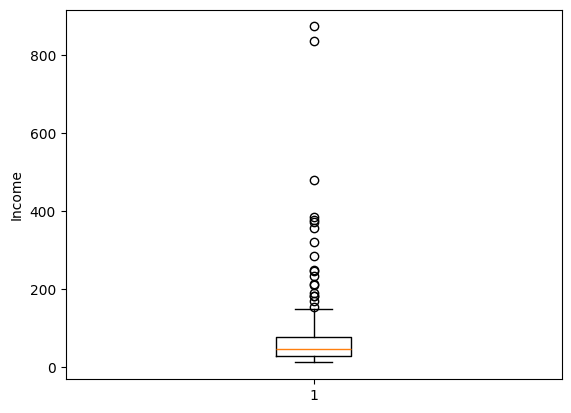

In [ ]:
plt.boxplot(demo_df.income)
plt.ylabel('Income')
plt.show()

<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline_horizontal -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="9021194372"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>


For now, we'll just remove these outliers, however this is not always the best option and once we have gained more experience, we can consider some more technical methods to handle the outlier problems


In [ ]:
def getOutliers(column):

    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    interquantile_range = q3-q1
    lower_fence = q1 - 1.5*interquantile_range
    upper_fence = q3 + 1.5*interquantile_range

    outlier_indicies = np.where((column < lower_fence) | (column > upper_fence))[0]
    outliers = np.array(column[outlier_indicies])
    return outliers, outlier_indicies

In [ ]:
# obtain the indexes of outliers
outliers, indexes = getOutliers(demo_df.income)
# remove the rows by index
demo_df2 = demo_df.drop(indexes, axis=0)

In [ ]:
# summarize categorical columns
demo_df2.describe(include='object') 

,gender,marital_status
count,181,181
unique,4,3
top,m,0
freq,90,89


In [ ]:
# find unique values
demo_df2.gender.unique()

array(['f', '  f', 'm', '   m'], dtype=object)

We observe here that gender has 4 unique observations but after printing them out, we notice there only really 2 unique values, just recorded not properly (spaces around some observations).

So now we need to strip the gender values of the spaces of the spaces aroung them.

In [ ]:
# replace gender values 
demo_df3 = demo_df2.replace(to_replace={'  f': 'f',  '   m': 'm'})
# look at the updated data
demo_df3.gender.unique()

array(['f', 'm'], dtype=object)

We now have only 2 unique observations that is `f` and `m`. 

<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline_horizontal -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="9021194372"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

That's done, now we can explore Marital Status for any potential issues to fix

In [ ]:
marital_status_counts = demo_df3.marital_status.value_counts()
marital_status_counts

marital_status
0            89
1            87
no answer     5
Name: count, dtype: int64

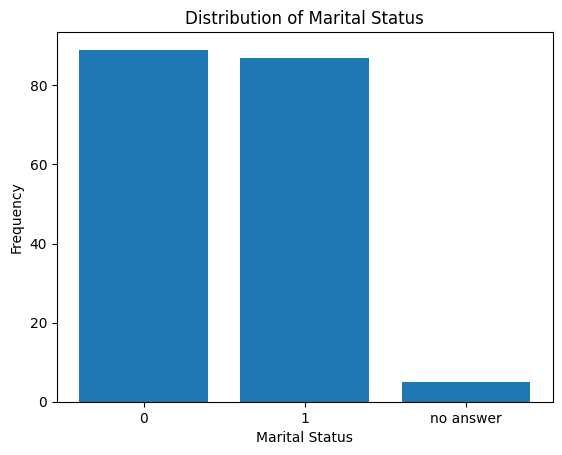

In [ ]:
plt.bar(x=marital_status_counts.index, height=marital_status_counts.values)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

We observe that we have people that never provided their marital status. For now, we can remove them and later when we have gotten more experience, we can find more technical and safer ways to handle these.

In [ ]:
demo_df4 = demo_df3[demo_df3.marital_status != 'no answer'].copy()

That will return to us only the rows where the Marital Status is either `1` or `0`

<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline_horizontal -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="9021194372"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

It turns out that most machine learning models work well with numbers. So we want to covert the nominal variables from string to either `int` or `float`

In [ ]:
demo_df4['marital_status'] = demo_df4.marital_status.astype('int')

Let's also create dummy variables for the gender categories. Dummy variables are binary (0 or 1) variables created from categorical variables to be used in regression models. In Python, they can be created using the `pd.get_dummies()` function from the pandas library.

In [ ]:
demo_df5 = pd.get_dummies(
    data=demo_df4, 
    columns=['gender'], 
    drop_first=True, 
    dtype='int'
)

In [ ]:
demo_df5.sample(n=5)

,age,marital_status,address,income,income_category,job_category,gender_m
159,27,0,0,25.0,2.0,1,0
110,44,1,8,46.0,2.0,3,1
60,23,1,1,15.0,1.0,1,1
186,44,0,13,104.0,4.0,2,0
168,48,1,16,29.0,2.0,3,1


That's our last preprocessing act for now. 

### Choosing the right model 

When choosing a machine learning model, consider the following factors:

1. **Nature of the problem**: Determine whether it's a classification, regression, clustering, or another type of problem.
2. **Data characteristics**: Assess the size, dimensionality, and quality of the dataset, including handling of missing values and categorical features.
3. **Interpretability**: Consider if model interpretability is crucial for the application or stakeholders.
4. **Computational efficiency**: Take into account the computational resources required for training and inference.
5. **Scalability**: Ensure the model can handle large datasets and be scaled up if needed.
6. **Domain knowledge**: Leverage any domain-specific insights to guide model selection and feature engineering.

We would like to predict `marital_status`, this makes our problem a classification problem. One of the popular classification models is the `LogisticRegression` model.

This is provided for us by Sci Kit Learn through an easy and intuitive API

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_regression_model = LogisticRegression()

### Training the Model

Before fitting or training a Machine Learning model, we need to identify what our independent features or variables are. Many Data Analysis like to call them `X`.

We also need to identify the outcome feature, commonly refered to as `y`.

In [ ]:
X = demo_df5.drop('marital_status', axis=1)
y = demo_df5.marital_status

So, to train our Machine Learning model using sklearn, we can just call the `fit()` method on the model object and pass to it the data ie `X` and `y` respectively

In [ ]:
logistic_regression_model.fit(X, y)

LogisticRegression()

### Evaluating the Model

We can see the model's accuracy on the entire data set by calling the `score()` method on the model object and passing to it the `X` and `y`.

In [ ]:
logistic_regression_model.score(X, y) * 100

55.68181818181818

We can observe that the model has scored 55.68% accuracy.

<div class="alert text-white rounded" style="background: #3a6e68;"><h4>Note!</h4><p>Accuracy is only one of many metrics that we can use to evaluate the performance of our model. We shall discover more metrics to use to understand the model performance</p></div>

### HyperParameter Tuning and Optimization

It turns out that `LogisticRegression` model class has some parameters that we can tune (or modify) to improve the performance of our model.

In [ ]:
logistic_regression_model2 = LogisticRegression(
    penalty='l1', 
    solver='liblinear',
    max_iter=100
)
logistic_regression_model2.fit(X, y)
logistic_regression_model2.score(X, y) * 100

56.25

It appears that modifying `penalty` and `solver` improved slightly improved our model.

### Predictions and Deployment

To make a prediction, first make sure that your model is trained. Then we can call the `predict()` method on the model object and pass to it the data that we want to make predictions on.

In [ ]:
# pick out from demo_df3 where marital status is no answer
demo_df6 = demo_df3[demo_df3.marital_status == 'no answer'].copy()

# removing marital status
demo_df6.drop('marital_status', axis=1, inplace=True)

# obtaining dummy variables for gender
demo_df6 = pd.get_dummies(
    data=demo_df6, 
    columns=['gender'], 
    drop_first=True, 
    dtype='int'
)

In [ ]:
demo_df6

,age,address,income,income_category,job_category,gender_m
2,28,9,28.0,2.0,1,0
4,25,2,23.0,1.0,2,1
7,46,20,75.0,4.0,3,1
8,41,10,26.0,2.0,2,1
9,29,4,19.0,1.0,2,0


In [ ]:
predictions = logistic_regression_model.predict(demo_df6)
print(predictions)

[0 1 0 1 0]


We can see the prediction returned as a numpy array. The predictions can also be added to the data eg `demo_df6`.

In [ ]:
demo_df6['predicted_marital_status'] = predictions
demo_df6

,age,address,income,income_category,job_category,gender_m,predicted_marital_status
2,28,9,28.0,2.0,1,0,0
4,25,2,23.0,1.0,2,1,1
7,46,20,75.0,4.0,3,1,0
8,41,10,26.0,2.0,2,1,1
9,29,4,19.0,1.0,2,0,0


In [ ]:
#| hide
#| export

import joblib

def loadModel(filename='model.di'):
    """
    Load a model from a file using joblib.

    Parameters:
    filename (str): The path to the file containing the model.

    Returns:
    object: The loaded model.
    """
    return joblib.load(filename)

def saveModel(model, filename='model.di'):
    """
    Save a model to a file using joblib.

    Parameters:
    model (object): The model to be saved.
    filename (str): The path to the file where the model will be saved.

    Returns:
    None
    """
    joblib.dump(model, filename)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

## References 

- [DATAIDEA - What is Demographic Data](https://blog.dataidea.org/posts/what-is-demographic-data/)
- [IBM - What is Machine Learning](https://www.ibm.com/topics/machine-learning)
- [Data Camp - What is Machine Learning](https://www.datacamp.com/blog/what-is-machine-learning)